In [640]:
from pathlib import Path               # For easy handling of file paths
from PyPDF2 import PdfReader           # To read and extract text from PDF files
import re                              # For regular expressions (pattern matching)
import pandas as pd   


#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import pandas as pd
import re


import json
import glob
import spacy

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim
import pandas as pd
from bertopic import BERTopic

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [641]:
import os
import random
import numpy as np
import tensorflow as tf  # if you are using tensorflow

In [642]:
os.environ['PYTHONHASHSEED'] = '0'
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [643]:

from pathlib import Path               # For easy handling of file paths
from PyPDF2 import PdfReader           # To read and extract text from PDF files
# Directory containing PDFs
pdf_dir = Path("/Users/agnesnamyalo/Desktop/RESEARCH/DATA/Artifact_files")


# Function to extract date and text
def extract_date_and_text(pdf_path):
    try:
        reader = PdfReader(str(pdf_path))  # Open the PDF using PyPDF2
        full_text = ""                     # Initialize empty string to hold full PDF text
        for page in reader.pages:          # Loop through all pages in the PDF
            page_text = page.extract_text()   # Extract text from page
            if page_text:
                full_text += page_text + "\n"   # Add page text to full text

        # Extract date (e.g., May 19, 1998)
        #Looking for a date format like May 19, 1998 using regex and stores it. If none is found, it uses "Unknown Date"
        date_match = re.search(r'([A-Z][a-z]+ \d{1,2}, \d{4})', full_text)
        date = date_match.group(0) if date_match else "Unknown Date"

        # Clean out headers
        #RemovING repeated headers like CONGRESSIONAL RECORD — HOUSE that clutter the PDF content.
        cleaned_text = re.sub(r'CONGRESSIONAL RECORD\s+—\s+HOUSE.*?\n', '', full_text, flags=re.DOTALL)

        #Return the result as a dictionary

        return {
            "filename": pdf_path.name,   # Just the file name (not full path)
            "date": date,     # Extracting the date
            "Text": cleaned_text.strip()  # Cleaned text
        }
    except Exception as e:
        return {
            "filename": pdf_path.name,
            "date": "Error",
            "Text": f"Error reading file: {e}"
        }



# Extract from all PDFs in folder
records = []
for pdf_file in pdf_dir.glob("*.pdf"):   # Loop through all PDF files in the folder
    result = extract_date_and_text(pdf_file)   # Runing the extraction function
    records.append(result)    # Save the result in a list



# Store in DataFrame
df = pd.DataFrame(records)

# Preview and optionally save
#df.head()
#df.to_csv("congress_pdf_texts.csv", index=False)


Illegal character in Name Object (b'/\x84\xf8\x88\r\xf77\xc7\x01\x8b\xf8\x96\x03\xf8\x96\xf7s\x15\xfc\x88\x06}O\x05\xf8\x88\x06\t\x0e\x94\xf8')
Illegal character in Name Object (b'/\x84\xf8\x88\r\xf77\xc7\x01\x8b\xf8\x96\x03\xf8\x96\xf7s\x15\xfc\x88\x06}O\x05\xf8\x88\x06\t\x0e\x94\xf8')
Illegal character in Name Object (b'/\x84\xf8\x88\r\xf77\xc7\x01\x8b\xf8\x96\x03\xf8\x96\xf7s\x15\xfc\x88\x06}O\x05\xf8\x88\x06\t\x0e\x94\xf8')
Illegal character in Name Object (b'/\x98\xa0\xbe\x8b\xa2\x08\x92\x89\x8f\x85\x1e\x7f\x8b\x89vy\x86\x08Y}L\x96Mx\x08j\x81Y\\\x8b')


In [644]:
df.head()

,filename,date,Text
0,CREC-2005-07-12-pt1-PgD739-2.pdf,"July 12, 2005",CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...
1,CREC-2018-11-13-pt1-PgD1164.pdf,"November 13, 2018",CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...
2,CREC-2006-03-09-pt1-PgD217-2.pdf,"March 9, 2006",CONGRESSIONAL RECORD —DAILY DIGEST D217 March ...
3,CREC-2002-06-18-pt1-PgD636.pdf,"June 18, 2002",CONGRESSIONAL RECORD —DAILY DIGEST D636 June 1...
4,CREC-2014-03-25-pt1-PgD309-2.pdf,"March 25, 2014",CONGRESSIONAL RECORD — DAILY DIGEST D309 March...


In [645]:
# Load your STM keywords
#stm_words_df = pd.read_csv("news_stm_topic_keywords_with_weights.csv")
#stm_keywords = set(w.lower() for w in stm_words_df['keyword'])


# Load your STM keywords
stm_words_df = pd.read_csv("news_stm_topic_keywords_with_weights.csv")
stm_keywords = set(
    w.lower() for w in stm_words_df['keyword']
    if w.lower() not in {'a.m.', 'p.m.'}
)

In [646]:
print(stm_keywords)

{'law', 'service', 'butterfly', 'work', 'marine', 'grizzly', 'water', 'court', 'dam', 'federal', 'habitat', 'republican', 'make', 'island', 'president', 'agency', 'plant', 'county', 'area', 'tree', 'condor', 'kill', 'hunt', 'time', 'vote', 'breed', 'wolf', 'senate', 'california', 'bear', 'bald', 'fire', 'river', 'u.s.', 'sea', 'case', 'owl', 'mountain', 'log', 'american', 'nest', 'protection', 'wildlife', 'clinton', 'farmer', 'subc', 'salmon', 'administration', 'protect', 'threaten', 'school', 'bill', 'industry', 'state', 'otter', 'timber', 'plan', 'fish', 'year', 'turtle', 'house', 'forest', 'congress', 'environmental', 'park', 'animal', 'whale', 'people', 'oil', 'office', 'list', 'land', 'eagle', 'bird'}


In [647]:
def filter_lines_with_keywords(text, keywords):
    lines = text.split('\n')
    filtered = [line for line in lines if any(keyword in line.lower() for keyword in keywords)]
    return "\n".join(filtered)

In [648]:
# Apply to the DataFrame
df['filtered_lines'] = df['Text'].apply(lambda x: filter_lines_with_keywords(x, stm_keywords))

In [649]:
df.head()

,filename,date,Text,filtered_lines
0,CREC-2005-07-12-pt1-PgD739-2.pdf,"July 12, 2005",CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...,CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...
1,CREC-2018-11-13-pt1-PgD1164.pdf,"November 13, 2018",CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...,CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...
2,CREC-2006-03-09-pt1-PgD217-2.pdf,"March 9, 2006",CONGRESSIONAL RECORD —DAILY DIGEST D217 March ...,CONGRESSIONAL RECORD —DAILY DIGEST D217 March ...
3,CREC-2002-06-18-pt1-PgD636.pdf,"June 18, 2002",CONGRESSIONAL RECORD —DAILY DIGEST D636 June 1...,CONGRESSIONAL RECORD —DAILY DIGEST D636 June 1...
4,CREC-2014-03-25-pt1-PgD309-2.pdf,"March 25, 2014",CONGRESSIONAL RECORD — DAILY DIGEST D309 March...,CONGRESSIONAL RECORD — DAILY DIGEST D309 March...


In [650]:
print(stm_keywords)

{'law', 'service', 'butterfly', 'work', 'marine', 'grizzly', 'water', 'court', 'dam', 'federal', 'habitat', 'republican', 'make', 'island', 'president', 'agency', 'plant', 'county', 'area', 'tree', 'condor', 'kill', 'hunt', 'time', 'vote', 'breed', 'wolf', 'senate', 'california', 'bear', 'bald', 'fire', 'river', 'u.s.', 'sea', 'case', 'owl', 'mountain', 'log', 'american', 'nest', 'protection', 'wildlife', 'clinton', 'farmer', 'subc', 'salmon', 'administration', 'protect', 'threaten', 'school', 'bill', 'industry', 'state', 'otter', 'timber', 'plan', 'fish', 'year', 'turtle', 'house', 'forest', 'congress', 'environmental', 'park', 'animal', 'whale', 'people', 'oil', 'office', 'list', 'land', 'eagle', 'bird'}


In [651]:
import spacy

def lemmatize_remove_stopwords(texts):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    nlp.max_length = 2_000_000
    cleaned_texts = []
    for text in texts:
        doc = nlp(text)
        tokens = [token.lemma_ for token in doc if not token.is_stop]
        cleaned_texts.append(" ".join(tokens))
    return cleaned_texts

# Usage example:
df['cleaned_text'] = lemmatize_remove_stopwords(df['filtered_lines'].tolist())


In [652]:
df.head()

,filename,date,Text,filtered_lines,cleaned_text
0,CREC-2005-07-12-pt1-PgD739-2.pdf,"July 12, 2005",CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...,CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...,congressional RECORD — DAILY DIGEST D739 July ...
1,CREC-2018-11-13-pt1-PgD1164.pdf,"November 13, 2018",CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...,CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...,congressional record — DAILY DIGEST D1164 Nove...
2,CREC-2006-03-09-pt1-PgD217-2.pdf,"March 9, 2006",CONGRESSIONAL RECORD —DAILY DIGEST D217 March ...,CONGRESSIONAL RECORD —DAILY DIGEST D217 March ...,congressional RECORD — DAILY DIGEST D217 March...
3,CREC-2002-06-18-pt1-PgD636.pdf,"June 18, 2002",CONGRESSIONAL RECORD —DAILY DIGEST D636 June 1...,CONGRESSIONAL RECORD —DAILY DIGEST D636 June 1...,congressional RECORD — DAILY DIGEST d636 June ...
4,CREC-2014-03-25-pt1-PgD309-2.pdf,"March 25, 2014",CONGRESSIONAL RECORD — DAILY DIGEST D309 March...,CONGRESSIONAL RECORD — DAILY DIGEST D309 March...,congressional RECORD — DAILY DIGEST D309 March...


In [530]:
# Remove all newline characters from the 'filtered_lines' column and save to 'cleaned_text'
#df['cleaned_text'] = df['filtered_lines'].str.replace('\n', ' ', regex=False)

# Preview the DataFrame with the cleaned column
#print(df[['filtered_lines', 'cleaned_text']].head())

In [653]:
def clean_remove_newlines_lower(texts):  #lowering the text
    return texts.str.replace('\n', ' ', regex=False).str.lower() #removing sentence separators eg \n

df['cleaned_text'] = clean_remove_newlines_lower(df['filtered_lines'])

In [654]:
# Remove words with both letters and digits
df['cleaned_text'] = df['cleaned_text'].str.replace(r'\b\w*\d\w*\b', '', regex=True)

# Optional: Remove extra whitespace
df['cleaned_text'] = df['cleaned_text'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [655]:
import re

def clean_text(text):
    # Remove patterns like E:\CR\FM\D25MR4.REC dsk7sptvn1prod
    text = re.sub(r'E:\\CR\\FM\\D\d{2}[A-Z]{2}\d\.REC\s+\w+', '', text)
    # Remove a.m., p.m., am, pm
    text = re.sub(r'\b(a\.m\.|p\.m\.|am|pm)\b', '', text, flags=re.IGNORECASE)
    # Remove weird artifacts like 'SH–216'
    text = re.sub(r'\bSH–216\b', '', text)
    # Remove non-alpha "words" (e.g., digits, single letters, dash-words)
    text = re.sub(r'\b[^a-zA-Z]+\b', ' ', text)
    # Remove any remaining fragments of form "record", "hear", "hearing", "committee", etc. (optional, for cleaner results)
    text = re.sub(r'\b(record|hear|hearing|committee|entitle|presentation|response|legislation|act|amend|title|estate|deceased|veteran|benefit|burial|claim|request|program|center|pilot|property|lease|taxpayer|individual|unemployment|bond|financing)\b', '', text, flags=re.IGNORECASE)
    # Remove multiple spaces/newlines
    text = re.sub(r'\s+', ' ', text)
    # Strip leading/trailing spaces
    text = text.strip()
    return text
# Apply the function to your DataFrame
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)

In [656]:
import re

# Optional: Define a set of valid two-letter English words to preserve ('an', 'in', 'is', 'on', etc.)
valid_two_letter_words = set(['am', 'an', 'as', 'at', 'be', 'by', 'do', 'go', 'he', 'if', 'in', 'is', 'it', 'me', 'my', 'no', 'of', 'on', 'or', 'so', 'to', 'up', 'us', 'we'])

def clean_text(text):
    # Remove repetitive file/record headers and boilerplate codes
    text = re.sub(r'\b(E|SH|FM|REC|CR|D\d{2}[A-Z]{2}\d|dsk7sptvn1prod)\b', '', text)
    text = re.sub(r'E:\\CR\\FM\\D\d{2}[A-Z]{2}\d\.REC(\s+\w+)*', '', text)
    # Remove time marks (am/pm/a.m./p.m.)
    text = re.sub(r'\b(a\.m\.|p\.m\.|am|pm)\b', '', text, flags=re.IGNORECASE)
    # Remove digit-only "words" and punctuation noise
    text = re.sub(r'\b[\d\W]+\b', ' ', text)
    # Remove single letters (isolated)
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    # Remove two-letter words not in valid set
    text = ' '.join([word for word in text.split() if len(word) > 2 or word.lower() in valid_two_letter_words])
    # Remove any extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Strip leading/trailing spaces
    text = text.strip()
    return text

# Apply to DataFrame
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)

In [657]:
df.head()

,filename,date,Text,filtered_lines,cleaned_text
0,CREC-2005-07-12-pt1-PgD739-2.pdf,"July 12, 2005",CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...,CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...,congressional daily digest july new public law...
1,CREC-2018-11-13-pt1-PgD1164.pdf,"November 13, 2018",CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...,CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...,congressional daily digest november house of r...
2,CREC-2006-03-09-pt1-PgD217-2.pdf,"March 9, 2006",CONGRESSIONAL RECORD —DAILY DIGEST D217 March ...,CONGRESSIONAL RECORD —DAILY DIGEST D217 March ...,congressional daily digest march national repu...
3,CREC-2002-06-18-pt1-PgD636.pdf,"June 18, 2002",CONGRESSIONAL RECORD —DAILY DIGEST D636 June 1...,CONGRESSIONAL RECORD —DAILY DIGEST D636 June 1...,congressional daily digest june of the resolut...
4,CREC-2014-03-25-pt1-PgD309-2.pdf,"March 25, 2014",CONGRESSIONAL RECORD — DAILY DIGEST D309 March...,CONGRESSIONAL RECORD — DAILY DIGEST D309 March...,congressional daily digest march achieving cle...


In [658]:
#Cleaning text column

# Droping NaN or missing values
df= df[df['cleaned_text'].notna()]

# Dropping empty strings or strings with only spaces
df= df[df['cleaned_text'].str.strip() != ""]

# Dropping very short texts (less than 3 words, which confuse UMAP/HDBSCAN)
df= df[df['cleaned_text'].str.split().str.len() > 2]

# Convert to list of strings for BERTopic
texts = df['cleaned_text'].astype(str).tolist()

print(f"Number of documents for topic modeling: {len(texts)}")

Number of documents for topic modeling: 325


In [659]:
#Cleaning text column

# Droping NaN or missing values
df= df[df['cleaned_text'].notna()]

# Dropping empty strings or strings with only spaces
df= df[df['cleaned_text'].str.strip() != ""]

# Dropping very short texts (less than 3 words, which confuse UMAP/HDBSCAN)
df= df[df['cleaned_text'].str.split().str.len() > 2]

# Convert to list of strings for BERTopic
texts = df['cleaned_text'].astype(str).tolist()

print(f"Number of documents for topic modeling: {len(texts)}")

Number of documents for topic modeling: 325


In [539]:
# from bertopic import BERTopic
# from sklearn.cluster import KMeans
# from sentence_transformers import SentenceTransformer

# # Set general seeds
# np.random.seed(42)
# random.seed(42)

# # Step 1: Embed documents
# embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
# embeddings = embedding_model.encode(texts, show_progress_bar=True)

# # Step 2: Run KMeans to create exactly 9 topics (consistent with the rest of your code)
# kmeans_model = KMeans(n_clusters=9, random_state=42)
# predicted_topics = kmeans_model.fit_predict(embeddings)

# # Step 3: Fit BERTopic in "offline mode" using your clusters
# topic_model = BERTopic(
#     language="english",
#     nr_topics=None,    # No reduction, keep your 9 clusters
#     verbose=True
# )

# # Fit and get topics/probabilities
# topics, probs = topic_model.fit_transform(
#     texts, embeddings=embeddings, y=predicted_topics
# )

# # Step 4: View topics
# print(topic_model.get_topic_info())

# # Top words per topic
# for i in range(9):
#     print(f"Topic {i}:", topic_model.get_topic(i))

# # topics = list of assigned topic labels for texts
# # probs = list of probabilities for topic assignments per text


In [660]:
#exporting the wildlife dataset to be used for STM
df.to_csv('Artifact_congress_for_STMM.csv', index=False)

In [661]:
df.head()

,filename,date,Text,filtered_lines,cleaned_text
0,CREC-2005-07-12-pt1-PgD739-2.pdf,"July 12, 2005",CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...,CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...,congressional daily digest july new public law...
1,CREC-2018-11-13-pt1-PgD1164.pdf,"November 13, 2018",CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...,CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...,congressional daily digest november house of r...
2,CREC-2006-03-09-pt1-PgD217-2.pdf,"March 9, 2006",CONGRESSIONAL RECORD —DAILY DIGEST D217 March ...,CONGRESSIONAL RECORD —DAILY DIGEST D217 March ...,congressional daily digest march national repu...
3,CREC-2002-06-18-pt1-PgD636.pdf,"June 18, 2002",CONGRESSIONAL RECORD —DAILY DIGEST D636 June 1...,CONGRESSIONAL RECORD —DAILY DIGEST D636 June 1...,congressional daily digest june of the resolut...
4,CREC-2014-03-25-pt1-PgD309-2.pdf,"March 25, 2014",CONGRESSIONAL RECORD — DAILY DIGEST D309 March...,CONGRESSIONAL RECORD — DAILY DIGEST D309 March...,congressional daily digest march achieving cle...


In [542]:
# from bertopic import BERTopic
# from gensim.models.coherencemodel import CoherenceModel
# from gensim.corpora.dictionary import Dictionary

# # Imagine you already have your fitted BERTopic model and your texts

# # 1. Get the topics dictionary (topic: list of words)
# topics = topic_model.get_topics()

# # 2. Prepare texts tokenized (list of lists of tokens)
# tokenized_texts = [text.split() for text in texts]  # SIMPLE TOKENIZATION

# # 3. Create a Gensim dictionary and corpus
# dictionary = Dictionary(tokenized_texts)
# corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# # 4. Prepare the list of topics as lists of words (filter out -1)
# topics_list = [ [word for word, _ in topic_words] for topic_id, topic_words in topics.items() if topic_id != -1]

# # 5. Calculate coherence for each topic
# cm = CoherenceModel(topics=topics_list, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
# coherence_scores = cm.get_coherence_per_topic()

# # 6. Print coherence per topic
# for topic_num, score in enumerate(coherence_scores):
#     print(f"Topic {topic_num}: Coherence={score:.4f}")

# # 7. Optional: average coherence over all topics can be used as overall score
# print(f"Average coherence: {sum(coherence_scores)/len(coherence_scores):.4f}")


In [672]:
#removing the -1 topic
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic


# Set general seeds
np.random.seed(42)
random.seed(42)

# Fit your BERTopic model as before
vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model)
topics, probs = topic_model.fit_transform(texts)

# Get all topics and their keywords
topics_info = topic_model.get_topics()

# Prepare a list for top 10 topics excluding -1 (outliers)
topics = []
for topic_num, words in topics_info.items():
    if topic_num == -1:  # Skip outlier topic
        continue
    if len(topics) < 8: # Only take first ten topics, sorted by topic number
        topics.append({
            "Topic": topic_num,
            "Keywords": ', '.join([w[0] for w in words[:10]])  # Top ten keywords for each topic
        })

topics_df = pd.DataFrame(topics)
print(topics_df)

   Topic                                           Keywords
0      0  subcommittee, senate, states, united, federal,...
1      1  subcommittee, march, year, fiscal, hearings, h...
2      2  rule, subcommittee, shall, public, states, pro...
3      3  united, states, subcommittee, february, examin...
4      4  subcommittee, heard, house, held, department, ...
5      5  house, vote, roll, recorded, office, state, st...
6      6  subcommittee, testimony, department, heard, na...


In [605]:
# Get a DataFrame of the topic info (includes keywords as a string)
topic_info = topic_model.get_topic_info()

# For more detailed keywords (e.g., list of tokens with weights), you can extract like this:
topic_keywords = []
for topic_num in topic_info['Topic']:
    if topic_num == -1:  # skip outlier topic
        continue
    keywords = topic_model.get_topic(topic_num)
    # Get just the word list
    word_list = [kw[0] for kw in keywords]
    # Save topic number, full keyword string, and/or list
    topic_keywords.append({'Topic': topic_num, 'keywords': ', '.join(word_list)})

# Make a DataFrame and save to CSV
keywords_df = pd.DataFrame(topic_keywords)
keywords_df.to_csv("congress_bertopic_keywords.csv", index=False)


In [606]:
topics, probs = topic_model.fit_transform(texts)

In [607]:
print(len(topics))  # should output 325

325


In [608]:
import pandas as pd

# Assume you have these variables from your BERTopic workflow:
# df - original dataframe with columns 'filename', 'date', 'cleaned_text'
# topics - list of assigned topic numbers, length same as df
# topic_model - your BERTopic model fitted on df['cleaned_text']

# Extract topic keywords excluding outlier (-1)
topic_info = topic_model.get_topic_info()
topic_keywords = {}
for topic_num in topic_info['Topic']:
    if topic_num != -1:
        words = topic_model.get_topic(topic_num)
        keyword_str = ', '.join([word for word, _ in words])
        topic_keywords[topic_num] = keyword_str

# Build a dataframe mapping document to topic and keywords
doc_topics_df = pd.DataFrame({
    'filename': df['filename'],
    'date': df['date'],
    'topic': topics
})

# Map keywords for each topic
doc_topics_df['keywords'] = doc_topics_df['topic'].map(topic_keywords)

# Remove documents with -1 topic if you want
doc_topics_df = doc_topics_df[doc_topics_df['topic'] != -1]

print(doc_topics_df.head())


                           filename               date  topic  \
1   CREC-2018-11-13-pt1-PgD1164.pdf  November 13, 2018      4   
3    CREC-2002-06-18-pt1-PgD636.pdf      June 18, 2002      1   
5  CREC-2000-02-24-pt1-PgD119-4.pdf  February 24, 2000      2   
6    CREC-2005-05-04-pt1-PgD438.pdf        May 4, 2005      1   
8     CREC-2016-02-02-pt1-PgD92.pdf   February 2, 2016      0   

                                            keywords  
1  house, vote, roll, office, states, national, s...  
3  subcommittee, house, rule, public, heard, depa...  
5  subcommittee, march, year, fiscal, hearings, h...  
6  subcommittee, house, rule, public, heard, depa...  
8  senate, subcommittee, states, united, amendmen...  


In [609]:
doc_topics_df.to_csv("congress_BERTopic_topics_and_keywords.csv", index=False)

In [610]:
print(keywords_df)

   Topic                                           keywords
0      0  senate, subcommittee, states, united, federal,...
1      1  subcommittee, march, hearings, year, fiscal, h...
2      2  united, states, subcommittee, february, examin...
3      3  rule, subcommittee, shall, provides, rayburn, ...
4      4  house, vote, roll, states, funds, state, offic...
5      5  subcommittee, united, states, department, vete...
6      6  subcommittee, house, department, vote, roll, h...


In [611]:
keywords_df.to_csv("congress_bertopic_keywords.csv", index=False)

In [612]:
#Importing these files so that i dont have to run the model
keywords_df = pd.read_csv('congress_bertopic_keywords.csv')

bertopic_keywords_df = pd.read_csv('congress_bertopic_keywords_with_weights_01.csv')

#doc_topic_df = pd.read_csv('congress_document_topic_mapping.csv')

In [613]:
print(bertopic_keywords_df)

    topic       keyword    weight
0       0        senate  0.035986
1       0  subcommittee  0.035811
2       0        states  0.031008
3       0        united  0.029253
4       0       federal  0.027551
5       0         house  0.027103
6       0      national  0.024662
7       0         state  0.020158
8       0         water  0.018862
9       0     amendment  0.018495
10      1  subcommittee  0.046538
11      1        united  0.033427
12      1        states  0.032515
13      1       rayburn  0.023276
14      1       examine  0.022895
15      1      national  0.022866
16      1      hearings  0.022637
17      1         march  0.022420
18      1    department  0.020744
19      1       federal  0.020199
20      2  subcommittee  0.107626
21      2         march  0.085670
22      2          year  0.044552
23      2        fiscal  0.044256
24      2      hearings  0.042319
25      2          hold  0.040822
26      2      national  0.032991
27      2         april  0.032335
28      2     

In [614]:
df.head()

,filename,date,Text,filtered_lines,cleaned_text
0,CREC-2005-07-12-pt1-PgD739-2.pdf,"July 12, 2005",CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...,CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...,congressional daily digest july new public law...
1,CREC-2018-11-13-pt1-PgD1164.pdf,"November 13, 2018",CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...,CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...,congressional daily digest november house of r...
2,CREC-2006-03-09-pt1-PgD217-2.pdf,"March 9, 2006",CONGRESSIONAL RECORD —DAILY DIGEST D217 March ...,CONGRESSIONAL RECORD —DAILY DIGEST D217 March ...,congressional daily digest march national repu...
3,CREC-2002-06-18-pt1-PgD636.pdf,"June 18, 2002",CONGRESSIONAL RECORD —DAILY DIGEST D636 June 1...,CONGRESSIONAL RECORD —DAILY DIGEST D636 June 1...,congressional daily digest june of the resolut...
4,CREC-2014-03-25-pt1-PgD309-2.pdf,"March 25, 2014",CONGRESSIONAL RECORD — DAILY DIGEST D309 March...,CONGRESSIONAL RECORD — DAILY DIGEST D309 March...,congressional daily digest march achieving cle...


In [615]:
# Suppose you run BERTopic or STM and get a 'topics' array:
# topics = topic_model.fit_transform(texts)   # This should be length 325, one per document

docs = df['filename']   # 325 elements
print(len(docs), len(topics))   # should both print 325

#doc_topic_df = pd.DataFrame({'Document': docs, 'Topic': topics})
#print(doc_topic_df.head())


325 325


In [616]:
# If you used a topic model:
topics, _ = topic_model.fit_transform(df["cleaned_text"])  # topics will have length 325

docs = df['filename']  # 325 elements
print(len(docs), len(topics))  # should both print 325

doc_topic_df = pd.DataFrame({'Document': docs, 'Topic': topics})
print(doc_topic_df.head())


325 325
                           Document  Topic
0  CREC-2005-07-12-pt1-PgD739-2.pdf     -1
1   CREC-2018-11-13-pt1-PgD1164.pdf      4
2  CREC-2006-03-09-pt1-PgD217-2.pdf      1
3    CREC-2002-06-18-pt1-PgD636.pdf      5
4  CREC-2014-03-25-pt1-PgD309-2.pdf      1


In [617]:
# Count how many PDFs have Topic == -1
count_minus1 = (doc_topic_df['Topic'] == -1).sum()

print("Number of PDFs with Topic = -1:", count_minus1)

Number of PDFs with Topic = -1: 118


In [618]:
# After creating doc_topic_df
filtered_df = doc_topic_df[doc_topic_df['Topic'] != -1]

print(filtered_df.head())

                           Document  Topic
1   CREC-2018-11-13-pt1-PgD1164.pdf      4
2  CREC-2006-03-09-pt1-PgD217-2.pdf      1
3    CREC-2002-06-18-pt1-PgD636.pdf      5
4  CREC-2014-03-25-pt1-PgD309-2.pdf      1
5  CREC-2000-02-24-pt1-PgD119-4.pdf      2


In [619]:
#remaining document
filtered_df.shape

(207, 2)

In [620]:
filtered_df.to_csv('congress_document_topic_mapping.csv', index=False)

In [621]:
#I want a count of keywords for the wordcloud

keyword_counts = bertopic_keywords_df.groupby('keyword').size().reset_index(name='count')

#print(keyword_counts.sort_values(by='count', ascending=False))

keyword_counts.to_csv('Bertopic_keyword_counts_for_congress.csv', index=False)


In [622]:
bert_words = pd.read_csv("congress_bertopic_keywords_with_weights_01.csv")
#print(bert_words)

In [623]:
#trying to check keywords in topic 0
filtered_topic_bertopic = bert_words[bert_words['topic'] == 0]
print(filtered_topic_bertopic)

   topic       keyword    weight
0      0        senate  0.035986
1      0  subcommittee  0.035811
2      0        states  0.031008
3      0        united  0.029253
4      0       federal  0.027551
5      0         house  0.027103
6      0      national  0.024662
7      0         state  0.020158
8      0         water  0.018862
9      0     amendment  0.018495


In [624]:
# Group keywords by topic, using set for easy overlap checking
bertopic_topics = []
for topic, group in bert_words.groupby('topic'):
    keywords = set(group['keyword'])
    bertopic_topics.append({'topic': topic, 'keywords': keywords})

print(bertopic_topics[:5])  # Shows the first 5 topics in your desired format

[{'topic': 0, 'keywords': {'national', 'house', 'united', 'subcommittee', 'states', 'water', 'federal', 'senate', 'amendment', 'state'}}, {'topic': 1, 'keywords': {'hearings', 'national', 'department', 'subcommittee', 'united', 'rayburn', 'states', 'examine', 'march', 'federal'}}, {'topic': 2, 'keywords': {'hearings', 'april', 'hold', 'national', 'year', 'fiscal', 'subcommittee', 'rayburn', 'march', 'federal'}}, {'topic': 3, 'keywords': {'security', 'hold', 'subcommittee', 'provides', 'rayburn', 'examine', 'water', 'services', 'rule', 'shall'}}, {'topic': 4, 'keywords': {'heard', 'house', 'united', 'states', 'held', 'vote', 'office', 'public', 'state', 'roll'}}]


STM

In [625]:
import pandas as pd
stm_words = pd.read_csv("congress_stm_topic_keywords_with_weights.csv")
#print(stm_words)

In [626]:
#counting keywords in stm

keyword_counts_stm = stm_words.groupby('keyword').size().reset_index(name='count')

#print(keyword_counts_stm)

keyword_counts_stm.to_csv('STM_keyword_counts_for_congress.csv', index=False)


In [627]:
#To check the topic and see the weights of the keywords
filtered_topic = stm_words[stm_words['topic'] == 1]
print(filtered_topic)

   topic   keyword    weight
0      1      vote  0.012971
1      1      roll  0.010513
2      1    states  0.009195
3      1      rept  0.008633
4      1    united  0.007984
5      1  recorded  0.007950
6      1      bill  0.007091
7      1      ayes  0.007071
8      1  national  0.006889
9      1       nay  0.006858


In [628]:
#did this so that i can use it for the cosine similarity
# Group keywords by topic, using set for easy overlap checking
stm_topics = []
for topic, group in stm_words.groupby('topic'):
    keywords = set(group['keyword'])
    stm_topics.append({'topic': topic, 'keywords': keywords})

print(stm_topics[:5])  # Shows the first 5 topics in your desired format


[{'topic': 1, 'keywords': {'recorded', 'national', 'rept', 'united', 'states', 'vote', 'ayes', 'nay', 'bill', 'roll'}}, {'topic': 2, 'keywords': {'hearings', 'budget', 'national', 'hold', 'year', 'fiscal', 'subcommittee', 'department', 'rayburn', 'march'}}, {'topic': 3, 'keywords': {'security', 'national', 'entitled', 'subcommittee', 'united', 'states', 'examine', 'rayburn', 'federal', 'public'}}, {'topic': 4, 'keywords': {'nays', 'united', 'reserve', 'states', 'vote', 'yeas', 'fund', 'federal', 'senate', 'amendment'}}, {'topic': 5, 'keywords': {'may', 'national', 'year', 'fiscal', 'subcommittee', 'united', 'states', 'federal', 'july', 'senate'}}]


COSINE SIMILARITY

In [629]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

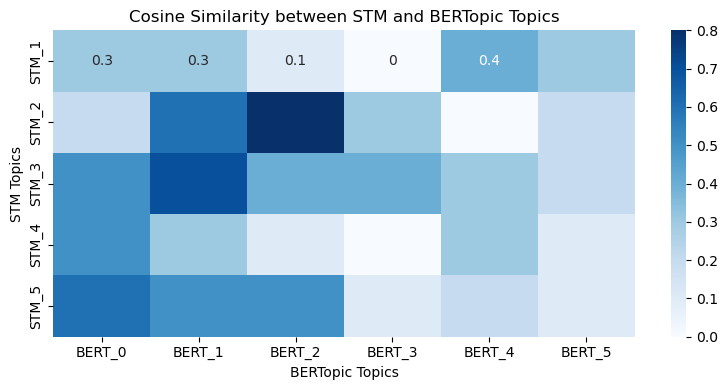

In [630]:
# 1. Unified vocabulary
all_keywords = set()
for t in stm_topics + bertopic_topics:
    all_keywords |= t['keywords']
vocab = sorted(all_keywords)

# 2. Vectorize topics
def to_vector(topic_keywords, vocab):
    return [1 if kw in topic_keywords else 0 for kw in vocab]
stm_vectors = np.array([to_vector(t['keywords'], vocab) for t in stm_topics])
bert_vectors = np.array([to_vector(t['keywords'], vocab) for t in bertopic_topics])

# 3. Compute cosine similarity
similarity_matrix = cosine_similarity(stm_vectors, bert_vectors)

# 4. Plot heatmap
plt.figure(figsize=(8,4))
sns.heatmap(similarity_matrix, annot=True, xticklabels=[f"BERT_{t['topic']}" for t in bertopic_topics], 
            yticklabels=[f"STM_{t['topic']}" for t in stm_topics], cmap="Blues")
plt.title("Cosine Similarity between STM and BERTopic Topics")
plt.xlabel("BERTopic Topics")
plt.ylabel("STM Topics")
plt.tight_layout()
plt.show()

#Made a heatmap in R

METADATA

In [631]:
df.head()

,filename,date,Text,filtered_lines,cleaned_text
0,CREC-2005-07-12-pt1-PgD739-2.pdf,"July 12, 2005",CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...,CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...,congressional daily digest july new public law...
1,CREC-2018-11-13-pt1-PgD1164.pdf,"November 13, 2018",CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...,CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...,congressional daily digest november house of r...
2,CREC-2006-03-09-pt1-PgD217-2.pdf,"March 9, 2006",CONGRESSIONAL RECORD —DAILY DIGEST D217 March ...,CONGRESSIONAL RECORD —DAILY DIGEST D217 March ...,congressional daily digest march national repu...
3,CREC-2002-06-18-pt1-PgD636.pdf,"June 18, 2002",CONGRESSIONAL RECORD —DAILY DIGEST D636 June 1...,CONGRESSIONAL RECORD —DAILY DIGEST D636 June 1...,congressional daily digest june of the resolut...
4,CREC-2014-03-25-pt1-PgD309-2.pdf,"March 25, 2014",CONGRESSIONAL RECORD — DAILY DIGEST D309 March...,CONGRESSIONAL RECORD — DAILY DIGEST D309 March...,congressional daily digest march achieving cle...


In [632]:
#getting oly GOID and Date from metadata
columns_to_keep = ['filename', 'date']

# Create a new DataFrame with only these columns
new_df = df[columns_to_keep]

print(new_df.head())

                           filename               date
0  CREC-2005-07-12-pt1-PgD739-2.pdf      July 12, 2005
1   CREC-2018-11-13-pt1-PgD1164.pdf  November 13, 2018
2  CREC-2006-03-09-pt1-PgD217-2.pdf      March 9, 2006
3    CREC-2002-06-18-pt1-PgD636.pdf      June 18, 2002
4  CREC-2014-03-25-pt1-PgD309-2.pdf     March 25, 2014


In [633]:
stm_gamma = pd.read_csv("stm_gamma_congress.csv")
stm_gamma.head(2)

,Unnamed: 0,document,topic,gamma
0,1,2,1,0.989956
1,2,7,1,0.387453


In [634]:
stm_gamma.shape

(325, 4)

In [635]:
STM_topics = pd.read_csv("congress_STM_topics_and_keywords.csv")
STM_topics.head(2)

,filename,date,Text,filtered_lines,cleaned_text,document,topic,gamma,keywords
0,CREC-2005-07-12-pt1-PgD739-2.pdf,"July 12, 2005",CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...,CONGRESSIONAL RECORD —DAILY DIGEST D739 July 1...,congressional daily digest july new public law...,1,3,0.942375,"subcommittee, states, united, security, entitled"
1,CREC-2018-11-13-pt1-PgD1164.pdf,"November 13, 2018",CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...,CONGRESSIONAL RECORD — DAILY DIGEST D1164 Nove...,congressional daily digest november house of r...,2,1,0.989956,"vote, roll, states, rept, united"


In [636]:
BERTopic_topics = pd.read_csv("congress_BERTopic_topics_and_keywords.csv")
BERTopic_topics.head(2)

,filename,date,topic,keywords
0,CREC-2018-11-13-pt1-PgD1164.pdf,"November 13, 2018",4,"house, vote, roll, office, states, national, s..."
1,CREC-2002-06-18-pt1-PgD636.pdf,"June 18, 2002",1,"subcommittee, house, rule, public, heard, depa..."


In [637]:
BERTopic_topics.shape

(191, 4)

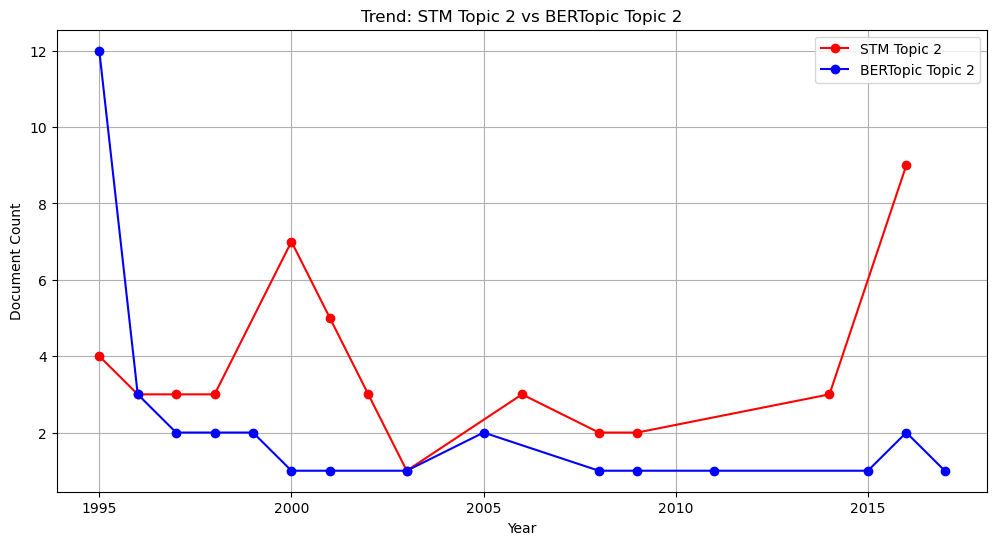

In [638]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
STM_topics = pd.read_csv("congress_STM_topics_and_keywords.csv")
BERTopic_topics = pd.read_csv("congress_BERTopic_topics_and_keywords.csv")

# Parse dates safely, set errors='coerce'
STM_topics['date'] = pd.to_datetime(STM_topics['date'], errors='coerce')
BERTopic_topics['date'] = pd.to_datetime(BERTopic_topics['date'], errors='coerce')

# Drop rows where date could not be parsed
STM_topics = STM_topics.dropna(subset=['date'])
BERTopic_topics = BERTopic_topics.dropna(subset=['date'])

# Filter for Topic 2 in each model
stm_topic2 = STM_topics[STM_topics['topic'] == 2]
bertopic_topic2 = BERTopic_topics[BERTopic_topics['topic'] == 2]

# Aggregate by year
stm_trend = stm_topic2.groupby(stm_topic2['date'].dt.year).size().reset_index(name='count')
bertopic_trend = bertopic_topic2.groupby(bertopic_topic2['date'].dt.year).size().reset_index(name='count')

# Plot trends
plt.figure(figsize=(12,6))
plt.plot(stm_trend['date'], stm_trend['count'], marker='o', color='red', label='STM Topic 2')
plt.plot(bertopic_trend['date'], bertopic_trend['count'], marker='o', color='blue', label='BERTopic Topic 2')
plt.xlabel("Year")
plt.ylabel("Document Count")
plt.title("Trend: STM Topic 2 vs BERTopic Topic 2")
plt.legend()
plt.grid(True)
plt.show()
